In [1]:
# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# Feature Selection
import xgboost as xgb
from sklearn.decomposition import PCA

# added imports
from explore import xgb_rank
from model import get_scaled_df

# Evaluate Algorithms

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data

import model
from model import lregression_test
from model import rregression_test
from model import pregression_test
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys 

**Let's bring in the DataFrame**

In [3]:
df = acquire_oil()
df = prep_data(df)

**(Rows, Columns)**

In [4]:
df.shape

(7888, 61)

### XGBoost Feature Recommender

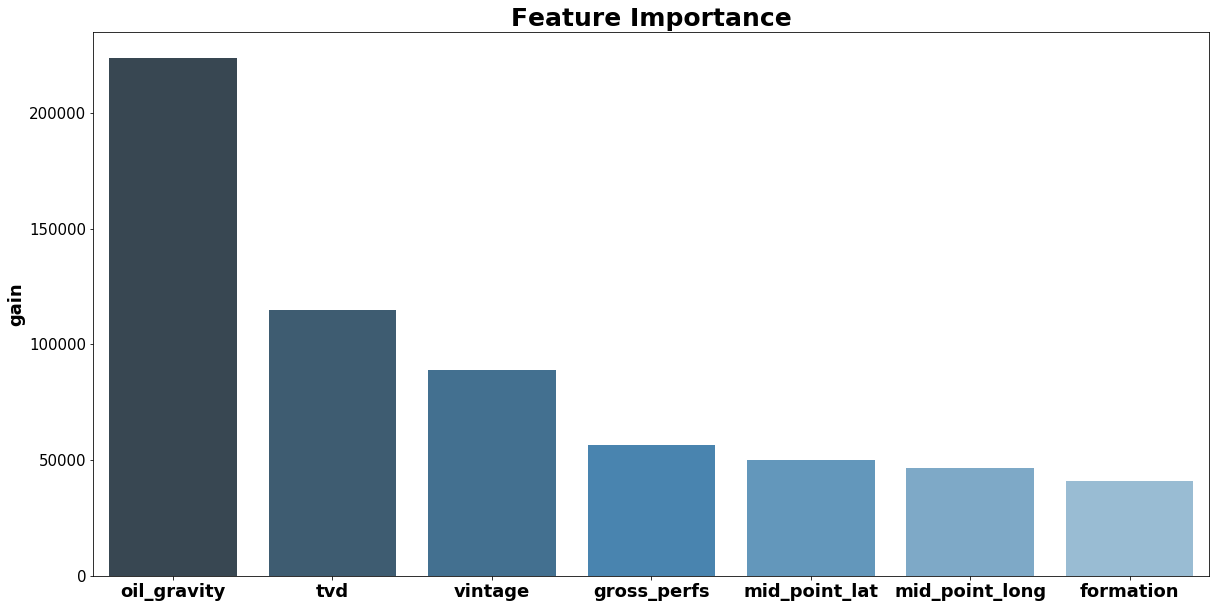

In [5]:
ranked_features, scaled_features, rank_df = xgb_rank(df, df.recovery)

# Create a list of integers to use for xticks
c = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.figure(figsize=(20,10))
sns.barplot(x='feature', y='gain', data=rank_df[:len(ranked_features)], palette="Blues_d").tick_params(labelsize=15)

group_labels = ranked_features

# take the length of ranked_features and plot that many features
plt.xticks(c[0:len(ranked_features)] , group_labels, weight='bold', fontsize=18)
plt.yticks()

plt.title('Feature Importance', weight='bold').set_fontsize('25')
plt.xlabel('')
plt.ylabel('gain', weight='bold').set_fontsize('18')

plt.show()

# Test Harness and Options

**Let's Cluster by our Top Seven features per our XGBoost function**

In [7]:
xfeatures = scaled_features
yfeature = ['recovery']
# scaled_df = get_scaled_df(df)

### Results for the entire dataframe to use as a baseline before clustering

Logistic Regression Model:
This regression model accounts for 27.28% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.26427984 0.28004745 0.26816461]
-----
The Coefficients of Variation: [[234.91375613 135.06461274 -80.53245088 205.39722631 100.28714444
  -24.79841312  55.71823639]]


Ridge Regression Model:
This regression model accounts for 28.32% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.27638409 0.29024696 0.27692253]
-----
The Coefficients of Variation: [[ 216.92922881  126.02499081 -182.61532614  241.04753815   54.13334516
   -80.41830833   51.67507207]]


Polynomial Regression Model:
This regression model accounts for 46.70% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.31556585 0.32981741 0.30719799]
-----
The Coefficients of Variation: [[ 2.38130040e+13 -1.19065020e+13 -1.76628809e+03  4.33677979e+01
  -5.15712891e+01  6.35605469e+01  3.74850830e

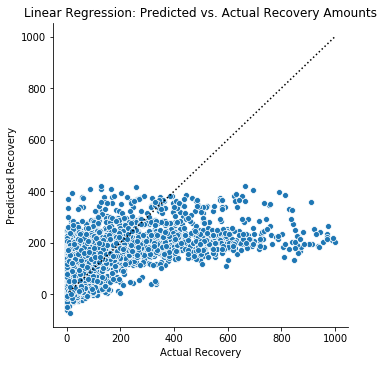

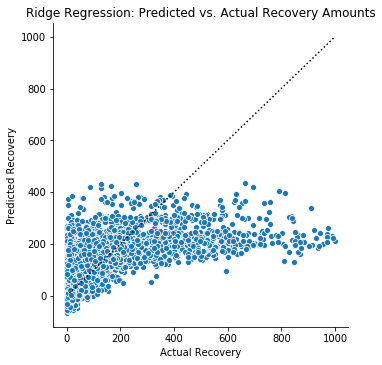

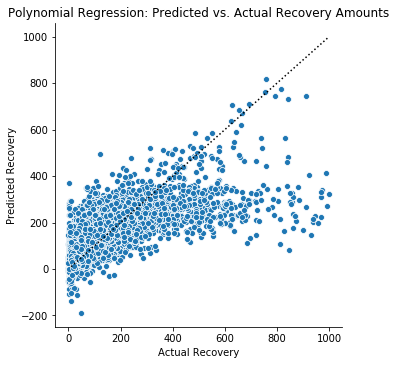

In [8]:
model.run_models(df, xfeatures, yfeature, 0.70)

**We now have a new dataframe with an added column "cluster_id"**

In [10]:
df = model.create_kclusters(df, xfeatures, 3, 'cluster_id')

**Let's see how many oberservations we have in each cluster**

In [11]:
df.cluster_id.value_counts()

0    4862
1    1701
2    1325
Name: cluster_id, dtype: int64

In [12]:
df.to_excel('CapstoneDataFinal.xlsx')

# ALL Regression Types on Each Cluster

### Cluster 0: 2331 Oberservations 

In [13]:
cluster_zero = df[df['cluster_id'] == 0]

Logistic Regression Model:
This regression model accounts for 15.97% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.16105262 0.14263637 0.16154466]
-----
The Coefficients of Variation: [[ 327.27820293  290.44067855 -315.68920209  294.71724988   89.85597448
   107.1985599    26.36771603]]


Ridge Regression Model:
This regression model accounts for 15.98% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.15835785 0.14392022 0.16000513]
-----
The Coefficients of Variation: [[ 320.81148135  261.06483989 -321.33576414  290.55476922   90.04821168
    82.45307976   23.86618857]]


Polynomial Regression Model:
This regression model accounts for 39.77% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.25499733 0.20731465 0.22618691]
-----
The Coefficients of Variation: [[ 1.85669165e+09 -3.30428698e+11  1.95404099e+11 -1.94712618e+11
  -8.35675307e+10 -7.58911128e+10  4.59

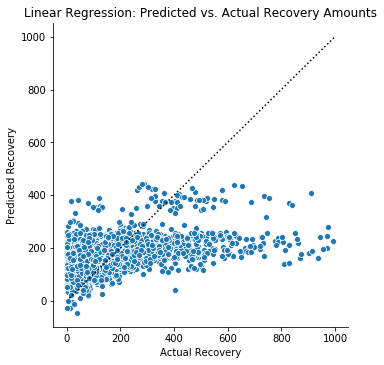

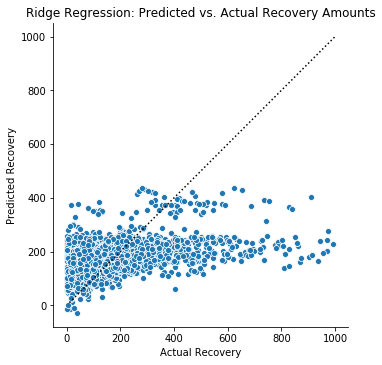

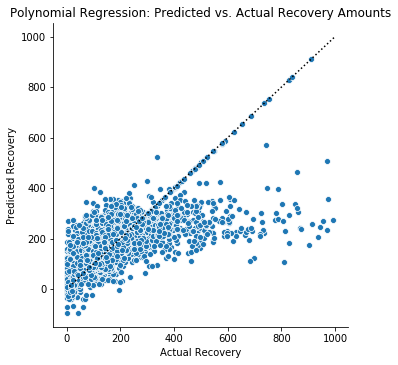

In [14]:
model.run_models(cluster_zero, xfeatures, yfeature, 0.70)

### Cluster 1: 3693 Observations

In [15]:
cluster_one = df[df['cluster_id'] == 1]

Logistic Regression Model:
This regression model accounts for 25.00% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.24013652 0.2481729  0.23408212]
-----
The Coefficients of Variation: [[ 146.1589948   215.7580056    21.39079039  114.70326552   11.27904217
  -201.81278036   36.71052073]]


Ridge Regression Model:
This regression model accounts for 26.14% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.25042438 0.25839362 0.24825789]
-----
The Coefficients of Variation: [[ 128.38911158  176.08600633 -323.68010369  136.68638795   -8.68023254
  -258.43940539   45.46510271]]


Polynomial Regression Model:
This regression model accounts for 57.10% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.25744049 0.33334597 0.2795972 ]
-----
The Coefficients of Variation: [[ 9.02735074e+12 -4.51367540e+12 -6.14383762e+04 -8.55988647e+02
  -2.30299622e+03  3.38656995e+03 -6.08

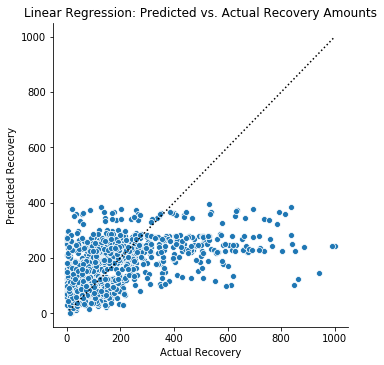

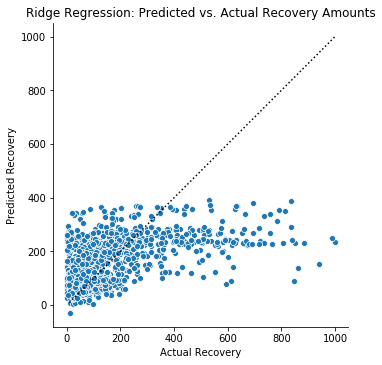

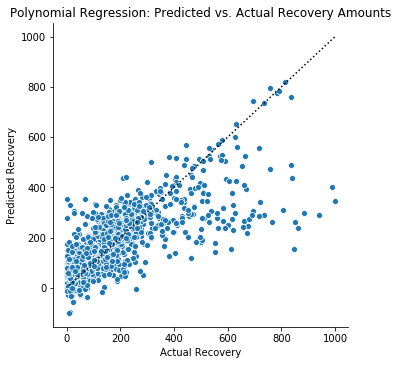

In [16]:
model.run_models(cluster_one, xfeatures, yfeature, 0.70)

### Cluster 2: 1864 Observations

In [17]:
cluster_two = df[df['cluster_id'] == 2]

Logistic Regression Model:
This regression model accounts for 28.64% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.31315402 0.28280891 0.25431493]
-----
The Coefficients of Variation: [[-38.17670898  46.89552429 -95.99257407 268.14295329  49.23890356
   55.76877792  35.19463949]]


Ridge Regression Model:
This regression model accounts for 34.70% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.38238394 0.32838032 0.31513588]
-----
The Coefficients of Variation: [[ -25.05489909   61.83070176 -105.00004047  179.07454281   37.34933307
   -46.16467922   27.31515476]]


Polynomial Regression Model:
This regression model accounts for 55.96% of the variance in recovery with the selected features.
-----
Cross-validation Scores: [0.42725047 0.31413014 0.2851941 ]
-----
The Coefficients of Variation: [[ 6.69598139e+09 -3.34468012e+09  1.45420860e+08 -9.45313495e+06
   3.97932274e+05  3.42245308e+05 -5.94179807e

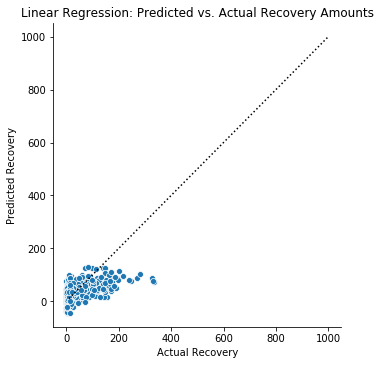

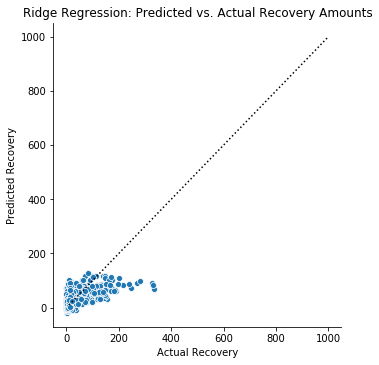

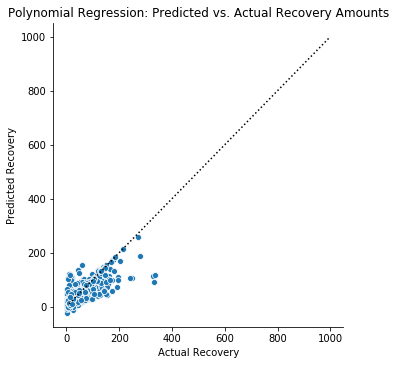

In [18]:
model.run_models(cluster_two, xfeatures, yfeature, 0.70)

## Interpret and report results

# Improve Results

## Algorithm Tuning

## Ensemble Methods

### Bagging

### Boosting

### Blending

## Extreme Feature Engineering